## Instructions


If you find yourself unsure about something; then please make an appropriate assumption and explain/document your rationale.





## Linear Regression

Please download the song_data.csv for Linear Regression and Logistic Regression assignments. 

The audio features include attributes about the music track itself, such as duration, key, year. The metadata uses more abstract features, such as danceability, energy, or song hotttnesss. 

---


Train a regression model (of your choice) to identify the energy of the song.
1.   Briefly explain why you have chosen this model.  
2.   Note down your cost. 

In [249]:
# Some libraries 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
#Load data
df =pd.read_csv("drive/My Drive/intro_to_ml/song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [253]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [254]:
df['song_popularity'].unique()

array([ 73,  66,  76,  74,  56,  80,  81,  78,  63,  75,  69,  77,  71,
        62,  79,  13,  28,  11,  65,  70,  60,  72,  57,  64,  61,  67,
        94,  98,  59,  87,  85,  58,  92,  83,  44,  47,  54,  49,  52,
        95,  45,  38,  46,  53,  39,  88,  68,  37,  43,  84,  40,  41,
        10,  31,  48,  24,  29,  51,   4,   7,  50,  42,  30,  21,  55,
        14,  33,   8,  16,  34,  26,  15,  19,   5,   3,  22,  36,  32,
        35,   9,  82,  25,  86,  12,  18,  27,  17,   6,  20,   0,  90,
        93,  91,  89,  99,  97,  96,   1,   2,  23, 100])

Data Preprocessing


In [255]:
# Data Pre-Processing
# Drop non-numeric datapoints
df = df.drop(['song_name'],axis=1)
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Exp1 Predicting the Energy of the song

In [256]:
X = np.array(df.drop(['energy'],axis=1))  # Taking all the numeric features except Energy 
y = np.array(df['energy']) # Taking Energy values as y(output)

In [257]:
#splitting the data into training data and testing data 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 0)

In [258]:
# Standardization of the features or feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [259]:
X,y

(array([[7.30000e+01, 2.62333e+05, 5.52000e-03, ..., 1.67060e+02,
         4.00000e+00, 4.74000e-01],
        [6.60000e+01, 2.16933e+05, 1.03000e-02, ..., 1.05256e+02,
         4.00000e+00, 3.70000e-01],
        [7.60000e+01, 2.31733e+05, 8.17000e-03, ..., 1.23881e+02,
         4.00000e+00, 3.24000e-01],
        ...,
        [2.30000e+01, 1.82211e+05, 8.47000e-01, ..., 1.30534e+02,
         4.00000e+00, 2.86000e-01],
        [5.50000e+01, 3.52280e+05, 9.45000e-01, ..., 1.06063e+02,
         4.00000e+00, 3.23000e-01],
        [6.00000e+01, 1.93533e+05, 9.11000e-01, ..., 9.14900e+01,
         4.00000e+00, 5.81000e-01]]),
 array([0.682, 0.853, 0.463, ..., 0.325, 0.326, 0.381]))

In [262]:
#Training
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [263]:
# Testing
predictions = model.predict(X_test)
print(y_test,predictions)

[0.878 0.669 0.457 ... 0.741 0.921 0.508] [0.87587179 0.72380205 0.61524423 ... 0.59806582 0.70081026 0.66854739]


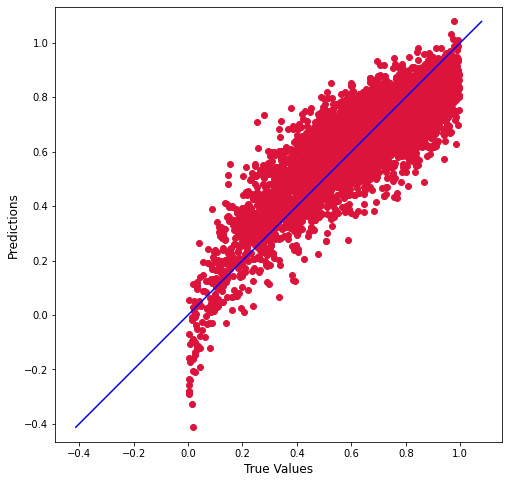

In [264]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predictions, c='crimson')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
# Testing
predictions = model.predict(X_test)
print(y_test,predictions)

[0.878 0.669 0.457 ... 0.741 0.921 0.508] [0.87587179 0.72380205 0.61524423 ... 0.59806582 0.70081026 0.66854739]


In [ ]:
error = predictions - y_test
print(error)

[-0.00212821  0.05480205  0.15824423 ... -0.14293418 -0.22018974
  0.16054739]


In [ ]:
cost = np.sum(np.power(predictions,2) - np.power(y_test,2)) /(len(predictions))
print(cost)

-0.01049183745578807


## Logistic Regression

Using the same data as above and train the model to classify it as whether it is danceable or not.

We define a song as danceable when the dancability score of the song is $\geq0.5$ and not not dancable when the dancablility score $<0.5$. 

In [265]:
# Define your X (everything except song_popularity) and y (song_popularity)
x1 = np.array(df.drop(['danceability'],axis=1))
y1 = np.array(df['danceability'])
y1[y1<0.5] =0
y1[y1>=0.5] = 1

In [266]:
#Divide the data into testing dataset and training dataset
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [267]:
#Training
model = LogisticRegression()
model.fit(x1_train,y1_train)


# Testing
prediction_logistic = model.predict(x1_test)
# print(prediction_logistic)
n=0
for i in range(len(prediction_logistic)):
    if prediction_logistic[i] == y1_test[i]:
        n+=1
print(n/len(prediction_logistic) *100) # 0.0% accuracy


81.23174940270772


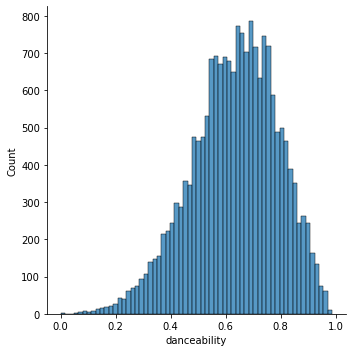

In [268]:
import seaborn as sns
sns.displot(df, x="danceability")

In [270]:
df['danceability'][df['danceability'] < 0.5] =0
df['danceability'][df['danceability'] >=0.5] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


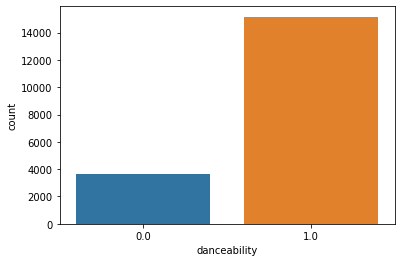

In [271]:
sns.countplot(df['danceability'])

In [272]:
y1[y1<=0.5] = 0
y1[y1>0.5] = 1

In [273]:
p,n = np.sum(y1 == 1),np.sum(y1 == 0)
p,n

(15164, 3671)

In [274]:
#Divide the data into testing dataset and training dataset
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [275]:
#Training
model = LogisticRegression()
model.fit(x1_train,y1_train)


# Testing
prediction_logistic = model.predict(x1_test)
# print(prediction_logistic)
n=0
for i in range(len(prediction_logistic)):
    if prediction_logistic[i] == y1_test[i]:
        n+=1
print(n/len(prediction_logistic) *100) # 0.0% accuracy


81.23174940270772


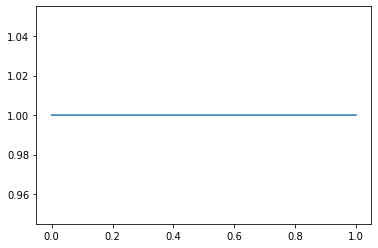

In [276]:
plt.plot(y1_test,prediction_logistic)

## Perceptron

Q. Consider the following code to generate two datasets: one linear (X1, y1) and another non-linear (X2, y2). You can change parameters for your convenience.

from sklearn import datasets
X1, y1 = datasets.make_classification(n_features=2, n_classes=2, n_samples=200, n_redundant=0, n_clusters_per_class=1)
X2, y2 = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)

(a) Implement the Perceptron algorithm from scratch. Verify if the algorithm takes atmost (RB)^2 iterations. R and B has usual meanings (Refer Theorem 9.1 in UML book)
    [Use (X1, y1) dataset]				[7 marks]

(b) Now use the (X2, y2) dataset and give an idea to solve the problem as a Binary classification problem using Perceptron.		[3 marks]
	[Web Resource: https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1]

In [277]:
from sklearn import datasets
X1, y1 = datasets.make_classification(n_features=2, n_classes=2, n_samples=200, n_redundant=0, n_clusters_per_class=1) #Linear Dataset
X2, y2 = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)   #Non-Linear Dataset



In [278]:
def input_withBias(X):
  bias = np.ones((X.shape[0],1))
  X0 = np.ones((X.shape[0],X.shape[1]+1))
  X0[:,:-1] = bias
  X0[:,:X1.shape[1]]=X
  return X0

def Weighted_input(X0, w):
    '''Compute net input as dot product'''
    return np.dot(X0, w)
    
def predicted_output(X, w):
    '''Return class label after unit step'''
    return np.where(Weighted_input(X, w) >= 0.0, 1, -1)

def percep_fit(X, y, eta=1, n_iter=100):
    '''loop over exemplars and update weights'''
    w = np.zeros(X.shape[1])
    for exemplar in range(n_iter):
        for xi, target in zip(X, y):
          if(target==1 and predicted_output(xi, w)<0):
            w += xi
          elif(target==0 and predicted_output(xi, w)>0):
            w -= xi   
    return w

In [303]:

w,total_iterations ,total_error= percep_fit(input_withBias(X1), y1, eta=1, n_iter=200)
print(w,total_iterations)

-3.2984763277403415 -1.7634448619077023


In [305]:
print(total_error) #error is not reducing since data is not completely separable

0.0


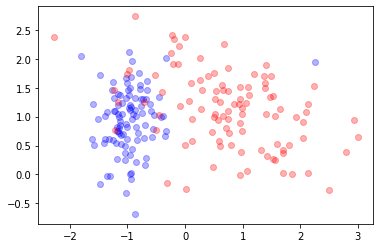

In [306]:
#Plotting Data
Q1x=[]
Q1y=[]
Q2x=[]
Q2y=[]
for xi, target in zip(X1, y1):
  if(target==1):
    Q1x.append(xi[0])
    Q1y.append(xi[1])
  else:
    Q2x.append(xi[0])
    Q2y.append(xi[1])
# print(Q1,Q2)

Qx = np.hstack((Q1x, Q2x))
Qy = np.hstack((Q1y, Q2y))
# print(len(Q2x),len(Q2y),len(Q1x),len(Q1y))
fig, ax = plt.subplots(nrows=1, ncols=1)

plt.scatter(Qx[:100], Qy[:100], color="blue", alpha=0.3)
plt.scatter(Qx[100:], Qy[100:], color="red", alpha=0.3)

ax = plt.gca()
# howblack = 0.15
# ax.set_facecolor((howblack, howblack, howblack))
plt.show()

In [279]:

w = percep_fit(input_withBias(X1), y1, eta=1, n_iter=250)
 #print(w)

[-4.34896787 -1.14350213  0.        ]


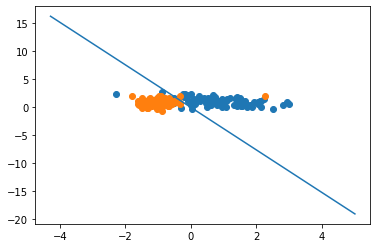

In [280]:
theta=w
print(w)
theta = theta.reshape(3)# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(X1[:,0]) - 2, max(X1[:,0]) + 2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/theta[1]) * (theta[0] * plot_x + theta[2])# Plotting the Single Line Decision Boundary
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = np.where(y1 == class_value)
	# create scatter of these samples
	plt.scatter(X1[row_ix, 0], X1[row_ix, 1])
# show the plot
plt.plot(plot_x, plot_y, label = "Decision_Boundary")
plt.show()

In [281]:
from numpy import linalg as LA
x_norm=[]
for i in range(0,X1.shape[0]):
  x_norm.append(LA.norm(X1[i]))
R=max(x_norm)
B=LA.norm(w)
print((R*B)*(R*B)) # Approximately 250 iterations(RB squared) divides the data with least error possible but It requires 1000 or more iterations to separate the classification data completely.

219.62032853230482


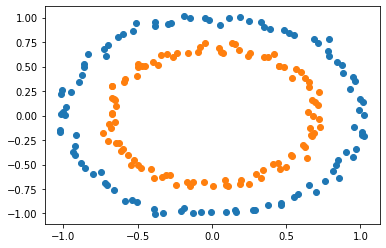

In [282]:
#Visualizing the Non-linearly separable Data
for class_value in range(2):
	row_ix = np.where(y2 == class_value)
	plt.scatter(X2[row_ix, 0], X2[row_ix, 1])
# show the plot
plt.show()



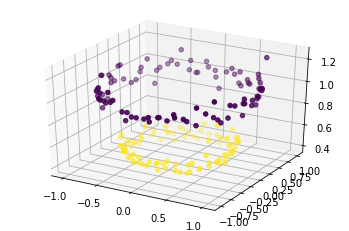

In [283]:
P1 = X2[:, 0].reshape((-1, 1))
P2 = X2[:, 1].reshape((-1, 1))
P3 = (P1**2 + P2**2)
X2 = np.hstack((X2, P3))
  
# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(P1, P2, P1**2 + P2**2, c = y2, depthshade = True)
plt.show()

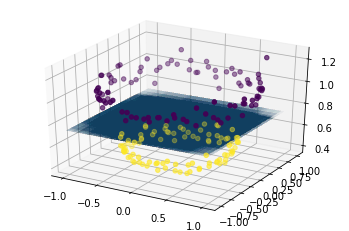

In [284]:
from sklearn import svm
  
svc = svm.SVC(kernel = 'linear')
svc.fit(X2, y2)
w = svc.coef_
b = svc.intercept_
  
# plotting the separating hyperplane
p1 = X2[:, 0].reshape((-1, 1))
p2 = X2[:, 1].reshape((-1, 1))
p1, p2 = np.meshgrid(p1, p2)
p3 = -(w[0][0]*p1 + w[0][1]*p2 + b) / w[0][2]
  
fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(P1, P2, P1**2 + P2**2, c = y2, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(p1, p2, p3, alpha = 0.01)
plt.show()

Q. Implement  3×1 MUX  for a boolean function with three variables (Use Pytorch)
                    (i) Make simple AND, OR, NOT logic gates using one layer perceptron combine them to make XOR. (XOR: F(A,B,C) = A'B + AB'+ B'C + BC').
                    (ii) Make a MLP for XOR gate of 3 variables and plot the decision boundary.
                    (iii) Comment on the complexity of both.

Useful Web Resources: https://d1b10bmlvqabco.cloudfront.net/attach/jl2b00mpen3au/jl2b0jnvzgn3hf/jn9f4p17wi31/CMSC422Perceptrons.pdf]9

In [285]:
#importing neccessary and useful libraries
import torch 
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  #3D
from matplotlib import cm # for fancy plotting
%matplotlib inline
torch.manual_seed(2)

In [286]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [287]:
# Perceptron Model
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        
        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

    def predict(self,x_num):
        x_tensor = torch.tensor(np.array(x_num).reshape(-1,self.num_features), dtype=torch.float32, device=device)
        predictions = self.forward(x_tensor).reshape(-1)
        return predictions.numpy()[0]

In [288]:
x = torch.Tensor([[0,0],[0,1],[1,0],[1,1]]).reshape(-1,2)
y_and = torch.Tensor([0,0,0,1]).reshape(-1,1)
y_or = torch.Tensor([0,1,1,1]).reshape(-1,1)
x_not = torch.Tensor([[0],[1]]).reshape(-1,1)
y_not =  torch.Tensor([[1],[0]]).reshape(-1,1)
y_xor = torch.Tensor([0,1,1,0]).reshape(-1,1)
print(x)
print(y_and)
print(y_or)
print(y_not)


tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.]])
tensor([[0.],
        [1.],
        [1.],
        [1.]])
tensor([[1.],
        [0.]])


In [289]:
#Training the AND using single layer perceptron
and_ppn = Perceptron(num_features=2)

x_train_tensor = torch.tensor(x, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_and, dtype=torch.float32, device=device)

and_ppn.train(x_train_tensor, y_train_tensor, epochs=5)
print('Model parameters:')
print('  Weights: %s' % and_ppn.weights)
print('  Bias: %s' % and_ppn.bias)

Model parameters:
  Weights: tensor([[2.],
        [1.]])
  Bias: tensor([-2.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [290]:
#Training the OR using single layer perceptron
or_ppn = Perceptron(num_features=2)

x_train_tensor = torch.tensor(x, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_or, dtype=torch.float32, device=device)

or_ppn.train(x_train_tensor, y_train_tensor, epochs=5)
print('Model parameters:')
print('  Weights: %s' % or_ppn.weights)
print('  Bias: %s' % or_ppn.bias)

Model parameters:
  Weights: tensor([[1.],
        [1.]])
  Bias: tensor([0.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [291]:
#Training the NOT using single layer perceptron
not_ppn = Perceptron(num_features=1)

x_train_tensor = torch.tensor(x_not, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_not, dtype=torch.float32, device=device)

not_ppn.train(x_train_tensor, y_train_tensor, epochs=5)
print('Model parameters:')
print('  Weights: %s' % not_ppn.weights)
print('  Bias: %s' % not_ppn.bias)

Model parameters:
  Weights: tensor([[-1.]])
  Bias: tensor([1.])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [292]:
def XOR(A,B,C):
  # A'B'C + A'BC' + AB'C'+ ABC
  # A_tensor = torch.tensor(np.array(A).reshape(-1,1), dtype=torch.float32, device=device)
  # B_tensor = torch.tensor(np.array(B).reshape(-1,1), dtype=torch.float32, device=device)
  # C_tensor = torch.tensor(np.array(C).reshape(-1,1), dtype=torch.float32, device=device)
  
  not_A = not_ppn.predict(A)
  not_B = not_ppn.predict(B)
  not_C = not_ppn.predict(C)
  # print(not_A,not_B,not_C)

  # A'B'C
  not_Axnot_B_input =[[not_A,not_B]] 
  not_Axnot_B = and_ppn.predict(not_Axnot_B_input)
  not_ABxC_input = [[not_Axnot_B,C]]
  sum_1 = and_ppn.predict(not_ABxC_input)

  # A'BC'
  not_AxB_input =[[not_A,B]] 
  not_AxB = and_ppn.predict(not_AxB_input)
  not_ABxnot_C_input = [[not_AxB,not_C]]
  sum_2 = and_ppn.predict(not_ABxnot_C_input)

  # AB'C'
  Axnot_B_input =[[A,not_B]] 
  Axnot_B = and_ppn.predict(Axnot_B_input)
  not_ABxnot_C_input = [[Axnot_B,not_C]]
  sum_3 = and_ppn.predict(not_ABxnot_C_input)

  # ABC
  AxB_input =[[A,B]] 
  AxB = and_ppn.predict(AxB_input)
  ABxC_input = [[AxB,C]]
  sum_4 = and_ppn.predict(ABxC_input)
 
  # A'B'C + A'BC'
  sum_5_input =[[sum_1,sum_2]] 
  sum_5 = or_ppn.predict(sum_5_input)

  # AB'C' + ABC
  sum_6_input =[[sum_3,sum_4]] 
  sum_6 = or_ppn.predict(sum_6_input)
  
  # AB'C' + ABC
  xor_input =[[sum_5,sum_6]] 
  xor = or_ppn.predict(xor_input)

  return xor


In [293]:
# XOR Function XOR(A,B,C) = A'B'C + A'BC' + AB'C' + ABC
print(XOR(1,1,1))
print(XOR(0,0,0))

1.0
0.0


**Implementing a MLP for XOR gate of 3 variables A, B, C**


In [294]:
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(3,2)
    # self.fc2 = nn.Linear(2,2)
    self.fc2 = nn.Linear(2,1)

  def forward(self,x):
    x = x.view(-1,3)
    x = F.sigmoid(self.fc1(x))
    x = self.fc2(x)
    # x = F.relu(self.fc3(x))
    # x = torch.where(x>0.5,self.ones,self.zeros)
    return x

In [295]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [296]:
# loss function
loss_func = nn.MSELoss()

In [297]:
# Optimizer
optimizer = optim.SGD(model.parameters(),lr=0.02,momentum=0.9)

In [298]:
# preparing model for training
model.train() 
x_train = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y_train = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])
x_tensor = torch.tensor(x_train, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)
print(y_tensor.size())

torch.Size([8, 1])


In [299]:
# number of epochs to train the model
n_epochs = 1000  # suggest training between 20-50 epochs

model.train() # prep model for training
x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])

x_tensor = torch.tensor(x, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y, dtype=torch.float32, device=device)
print(y_tensor.size())


for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
  
    for i in range(len(y)):
        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(x_tensor)
        # calculate the loss
        loss = loss_func(output, y_tensor)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*x_tensor.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(x_tensor)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

torch.Size([8, 1])
Epoch: 1 	Training Loss: 3.217546
Epoch: 2 	Training Loss: 2.510424
Epoch: 3 	Training Loss: 2.104901
Epoch: 4 	Training Loss: 2.122563
Epoch: 5 	Training Loss: 2.025978
Epoch: 6 	Training Loss: 2.016913
Epoch: 7 	Training Loss: 2.010884
Epoch: 8 	Training Loss: 2.003611
Epoch: 9 	Training Loss: 2.003897
Epoch: 10 	Training Loss: 2.002541
Epoch: 11 	Training Loss: 2.002233
Epoch: 12 	Training Loss: 2.002120
Epoch: 13 	Training Loss: 2.001939
Epoch: 14 	Training Loss: 2.001881
Epoch: 15 	Training Loss: 2.001805
Epoch: 16 	Training Loss: 2.001742
Epoch: 17 	Training Loss: 2.001687
Epoch: 18 	Training Loss: 2.001632
Epoch: 19 	Training Loss: 2.001581
Epoch: 20 	Training Loss: 2.001532
Epoch: 21 	Training Loss: 2.001485
Epoch: 22 	Training Loss: 2.001440
Epoch: 23 	Training Loss: 2.001396
Epoch: 24 	Training Loss: 2.001355
Epoch: 25 	Training Loss: 2.001314
Epoch: 26 	Training Loss: 2.001276
Epoch: 27 	Training Loss: 2.001238
Epoch: 28 	Training Loss: 2.001202
Epoch: 29 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 58 	Training Loss: 2.000531
Epoch: 59 	Training Loss: 2.000517
Epoch: 60 	Training Loss: 2.000504
Epoch: 61 	Training Loss: 2.000492
Epoch: 62 	Training Loss: 2.000479
Epoch: 63 	Training Loss: 2.000467
Epoch: 64 	Training Loss: 2.000456
Epoch: 65 	Training Loss: 2.000445
Epoch: 66 	Training Loss: 2.000434
Epoch: 67 	Training Loss: 2.000423
Epoch: 68 	Training Loss: 2.000412
Epoch: 69 	Training Loss: 2.000402
Epoch: 70 	Training Loss: 2.000392
Epoch: 71 	Training Loss: 2.000383
Epoch: 72 	Training Loss: 2.000374
Epoch: 73 	Training Loss: 2.000365
Epoch: 74 	Training Loss: 2.000356
Epoch: 75 	Training Loss: 2.000347
Epoch: 76 	Training Loss: 2.000339
Epoch: 77 	Training Loss: 2.000331
Epoch: 78 	Training Loss: 2.000323
Epoch: 79 	Training Loss: 2.000315
Epoch: 80 	Training Loss: 2.000307
Epoch: 81 	Training Loss: 2.000300
Epoch: 82 	Training Loss: 2.000293
Epoch: 83 	Training Loss: 2.000286
Epoch: 84 	Training Loss: 2.000279
Epoch: 85 	Training Loss: 2.000273
Epoch: 86 	Training 

In [300]:
# initialize lists to monitor test loss and accuracy
model.eval() # prep model for *evaluation*
x_test = [[1,1,1]]
x_test_tensor = torch.tensor(x_test, dtype=torch.float32, device=device)

output = model(x_test_tensor)
y_pred = 1 if output.detach().numpy()[0][0] >= 0.4999 else 0

print(output)
print(y_pred)

tensor([[0.4998]], grad_fn=<AddmmBackward0>)
0


In [301]:
print('Model parameters:')
print('  Weights: %s' % and_ppn.weights)
print('  Bias: %s' % and_ppn.bias)

Model parameters:
  Weights: tensor([[2.],
        [1.]])
  Bias: tensor([-2.])


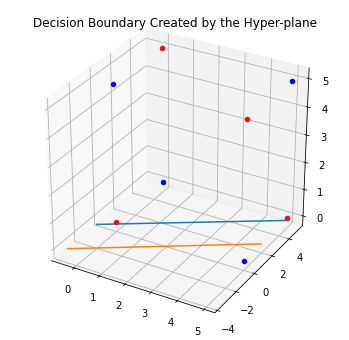

In [302]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(0,0,0,c='r',label= 'class 0')
ax.scatter(0,0,5,c='b',label= 'class 1')
ax.scatter(0,5,0,c='b',label= 'class 1')
ax.scatter(0,5,5,c='r',label= 'class 0')
ax.scatter(5,0,0,c='b',label= 'class 1')
ax.scatter(5,0,5,c='r',label= 'class 0')
ax.scatter(5,5,0,c='r',label= 'class 0')
ax.scatter(5,5,5,c='b',label= 'class 1')
plt.title('Decision Boundary Created by the Hyper-plane')
x_1 = np.arange(-0.5, 5.5, 0.5)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)
x_2 = np.arange(-0.5, 5.5, 0.5)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
